# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

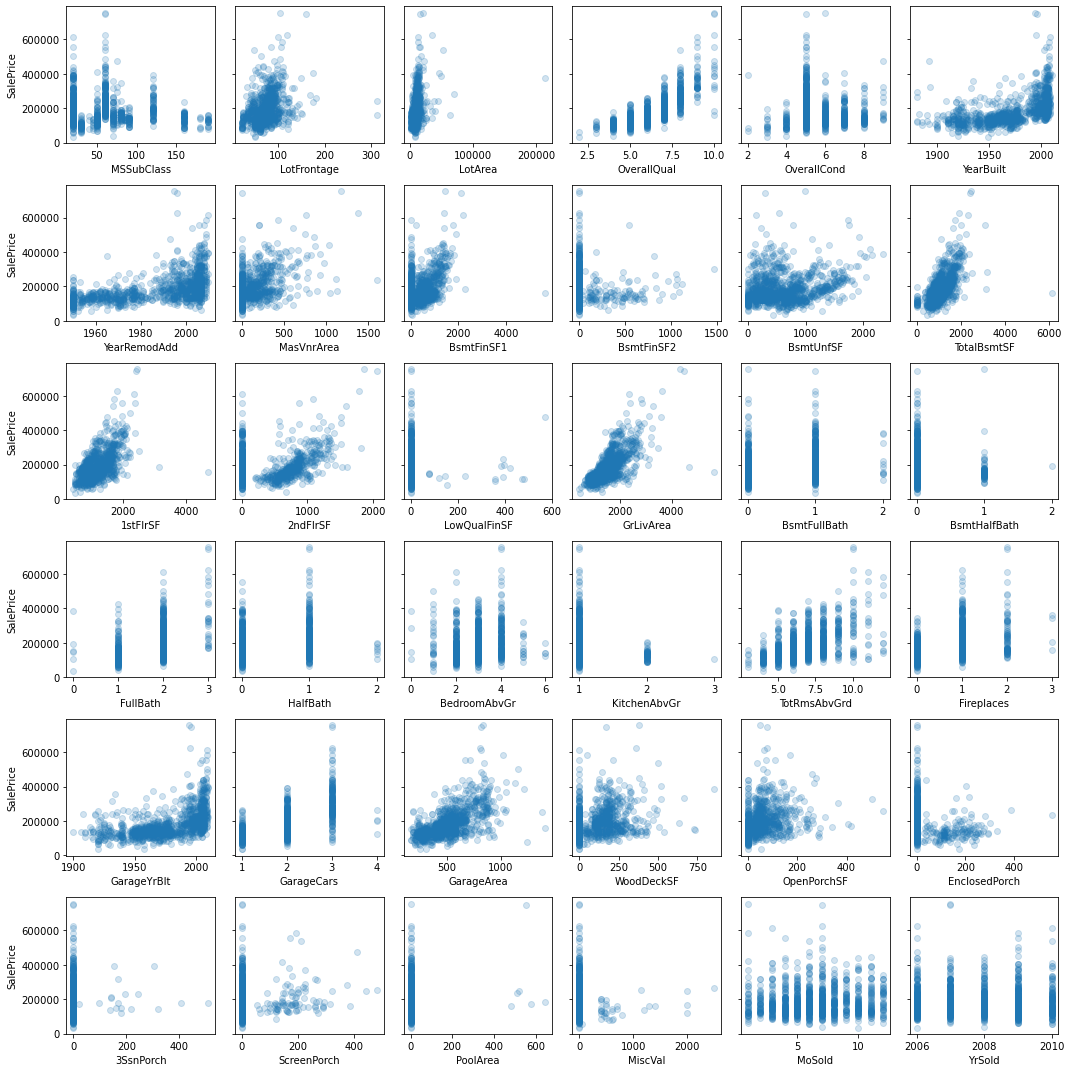

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [ ]:
# Your written answer here


### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


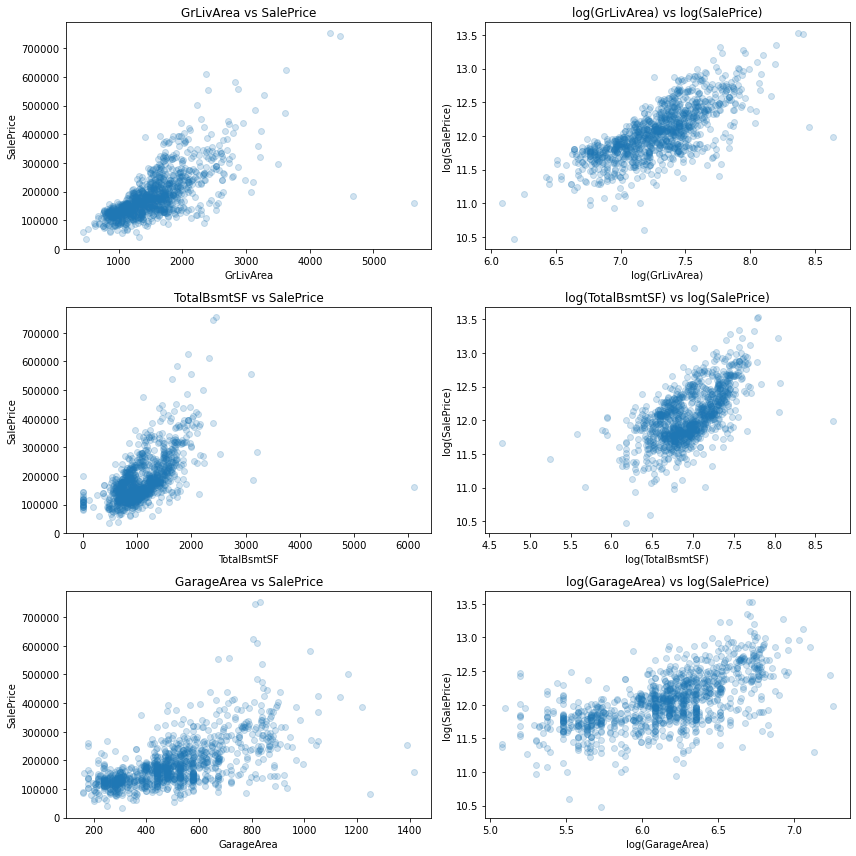

In [14]:
# Your code here
# Log-transform the identified features
log_y = np.log(y)
log_features = {
    'GrLivArea': np.log(X['GrLivArea']),
    'TotalBsmtSF': np.log(X['TotalBsmtSF']),
    'GarageArea': np.log(X['GarageArea'])
}

# Plot original vs. log-transformed
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, (feature_name, log_feature) in enumerate(log_features.items()):
    # Original feature vs SalePrice
    axes[i][0].scatter(X[feature_name], y, alpha=0.2)
    axes[i][0].set_title(f"{feature_name} vs SalePrice")
    axes[i][0].set_xlabel(feature_name)
    axes[i][0].set_ylabel("SalePrice")
    
    # Log-transformed feature vs log-transformed SalePrice
    axes[i][1].scatter(log_feature, log_y, alpha=0.2)
    axes[i][1].set_title(f"log({feature_name}) vs log(SalePrice)")
    axes[i][1].set_xlabel(f"log({feature_name})")
    axes[i][1].set_ylabel("log(SalePrice)")

fig.tight_layout()
plt.show()

Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [8]:
# Your code here - prepare data for modeling
# Prepare data for modeling
import statsmodels.api as sm

# Create a DataFrame for the log-transformed features
X_log = pd.DataFrame({
    'log_GrLivArea': np.log(X['GrLivArea']),
    'log_TotalBsmtSF': np.log(X['TotalBsmtSF']),
    'log_GarageArea': np.log(X['GarageArea'])
})

# Add a constant to the model (intercept)
X_log = sm.add_constant(X_log)

# Log-transformed target
y_log = np.log(y)

### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Check for non-positive values in the original dataset
non_positive_values = (X <= 0).any()
print("Non-positive values in the dataset:\n", non_positive_values)

# Replace non-positive values with a small positive number (e.g., 1e-5)
X = X.where(X > 0, 1e-5)

# Prepare data for modeling
X_log = pd.DataFrame({
    'log_GrLivArea': np.log(X['GrLivArea']),
    'log_TotalBsmtSF': np.log(X['TotalBsmtSF']),
    'log_GarageArea': np.log(X['GarageArea'])
})

# Add a constant to the model (intercept)
X_log = sm.add_constant(X_log)

# Log-transformed target
y_log = np.log(y)

# Check for NaN or infinite values
print("Check NaN in features:\n", X_log.isnull().sum())
print("Check NaN in target:\n", np.isnan(y_log).sum())

# Standardize the features
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_log.columns
vif_data["VIF"] = [variance_inflation_factor(X_log_scaled, i) for i in range(X_log_scaled.shape[1])]
print(vif_data)

# Build the OLS model
try:
    model = sm.OLS(y_log, X_log_scaled).fit()
    print(model.summary())
    
    # Coefficient interpretation
    for feature in ['log_GrLivArea', 'log_TotalBsmtSF', 'log_GarageArea']:
        coef = model.params[feature]
        print(f"The coefficient for {feature} is {coef:.4f}. This means that for a 1% increase in {feature}, the SalePrice is expected to increase by approximately {np.exp(coef) - 1:.2%}.")
except Exception as e:
    print(f"An error occurred while building the model: {e}")

Non-positive values in the dataset:
 MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
1stFlrSF         False
2ndFlrSF          True
LowQualFinSF      True
GrLivArea        False
BsmtFullBath      True
BsmtHalfBath      True
FullBath          True
HalfBath          True
BedroomAbvGr      True
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces        True
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF        True
OpenPorchSF       True
EnclosedPorch     True
3SsnPorch         True
ScreenPorch       True
PoolArea          True
MiscVal           True
MoSold           False
YrSold           False
dtype: bool
Check NaN in features:
 const              0
log_GrLivArea      0
log_TotalBsmtSF    0
log_GarageArea     0
dtype: int64
Ch

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [17]:
# Model summary
print(model.summary())

# Coefficient interpretation
feature_names = ['log_GrLivArea', 'log_TotalBsmtSF', 'log_GarageArea']
# Adjust the indexing based on how the model assigns names
param_names = ['const'] + feature_names  # Adding 'const' for the intercept

for i, feature in enumerate(param_names[1:], start=1):  # Skip the constant term for interpretation
    coef = model.params[i]
    print(f"The coefficient for {feature} is {coef:.4f}. This means that for a 1% increase in {feature}, the SalePrice is expected to increase by approximately {np.exp(coef) - 1:.2%}.")

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.2622
Date:                Fri, 29 Nov 2024   Prob (F-statistic):                       0.853
Time:                        10:38:09   Log-Likelihood:                         -4380.9
No. Observations:                1121   AIC:                                      8768.
Df Residuals:                    1118   BIC:                                      8783.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.